###### University of Chicago
###### CMSC 25900: Ethics, Fairness, Responsibility, and Privacy in Data Science, Spring 2020
###### Course Staff: Blase Ur, Galen Harrison, Raul Castro Fernandez, Weijia He

# Final Project: Interpretability in ML


## Dawei Huang

### Seven Test Cases of Regression and Classification Machine Learning Algorithms (Interpretable Models and Black Box Models)

In [1]:
# importing the required libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import accuracy_score
import randMethod

import shap
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import tree

import matplotlib.pyplot as plt
import warnings
import statsmodels.api as sm

### 1) Linear Regression of hour.csv data

We will first import the hours.csv dataset and perform a linear regression. The linear regression will then be evaluated by the randMethod library in order to quickly determine the variables that have the most weight on the output of the regression. Looking at the results of the randMethod assessment, we see that the "registered" variable clearly has the greatest impact on the output of the linear regression.

RandomGen Accuracy: 1.0


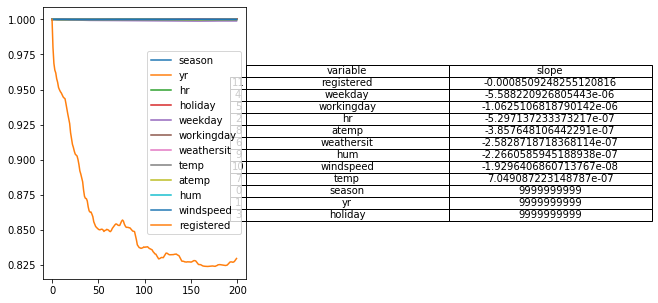

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

data = pd.read_csv('hour.csv')
dataSamp = data.sample(n=100)

X = data[['season','yr','hr','holiday','weekday','workingday','weathersit','temp','atemp','hum','windspeed','registered']][:100]
y = data['cnt'][:100]
    
randMethod.createGraph(X,y,list(X.columns),200, LinearRegression(),True) 
print("RandomGen Accuracy:", randMethod.accuracyScore(X,y,list(X.columns),200,LinearRegression(),['registered'],3))

Let us consider the Sharpley Value assessment. Looking at the result, it would appear that "registered" is the variable that has by far the most weight. This is also suggested by the randomGen graph we have printed above which shows the "registered" line graph to have the quickest descending slope.

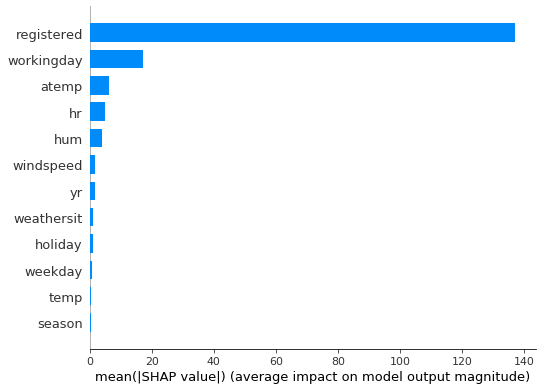

In [3]:
data = pd.read_csv('hour.csv')
dataSamp = data.sample(n=100)

X = dataSamp[['season','yr','hr','holiday','weekday','workingday','weathersit','temp','atemp','hum','windspeed','registered']]
y = dataSamp['cnt']

# Need to load JS vis in the notebook
shap.initjs()

reg = LinearRegression().fit(X, y)

explainer = shap.KernelExplainer(reg.predict, X[:100])
shap_values = explainer.shap_values(X[:100])
shap.summary_plot(shap_values, X[:100], plot_type="bar")

### 2) Decision Tree of hour.csv data

We will do something similar to what we had done above and perform a Decision Tree ML method on the same dataset hours.csv.

RandomGen Accuracy: 1.0


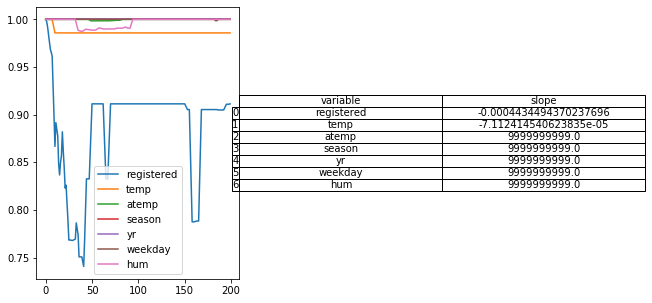

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data = pd.read_csv('hour.csv')

X = data[['season','yr','hr','holiday','weekday','workingday','weathersit','temp','atemp','hum','windspeed','registered']][:100]
y = data['cnt'][:100]
    
randMethod.createGraph(X,y,['registered','temp','atemp','season','yr','weekday','hum'],200, DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth = 3, min_samples_leaf = 5),True)
print("RandomGen Accuracy:", randMethod.accuracyScore(X,y,list(X.columns),200,DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth = 3, min_samples_leaf = 5),['registered','temp'],3))

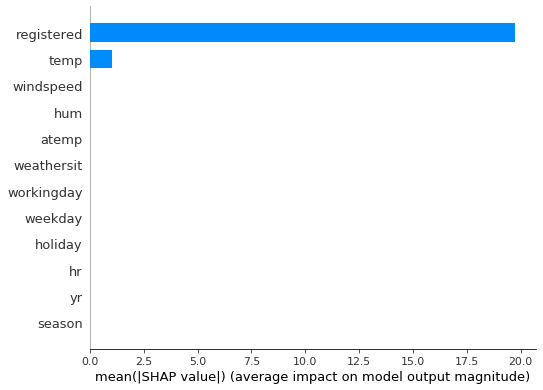

In [496]:
# Need to load JS vis in the notebook
shap.initjs()

from sklearn.metrics import accuracy_score

reg = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth = 3, min_samples_leaf = 5).fit(X, y)
reg.score(X, y)
pred = reg.predict(X)
pred

explainer = shap.KernelExplainer(reg.predict, X[:50])
shap_values = explainer.shap_values(X[:50])
shap.summary_plot(shap_values, X[:50], plot_type="bar")

Much like what we had seen for linear regression, both the randomGen and Sharpley Value assessment of the decision tree model suggests that "registered" has a much more significant weight than the other variables.

### 3) Random Forest of hour.csv data

We will do something similar to what we had done above and perform a random forest ML method on the same dataset hours.csv. Note that Random Forest is a black box model.

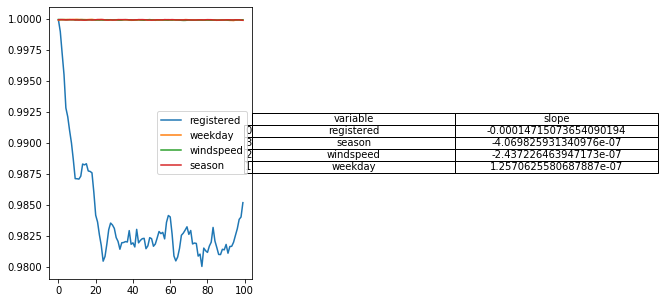

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor

data = pd.read_csv('hour.csv')
dataSamp = data.sample(n=100)

X = data[['season','yr','hr','holiday','weekday','workingday','weathersit','temp','atemp','hum','windspeed','registered']][:100]
y = data['cnt'][:100]

randMethod.createGraph(X,y,['registered','weekday','windspeed','season'],100,RandomForestRegressor(), True)

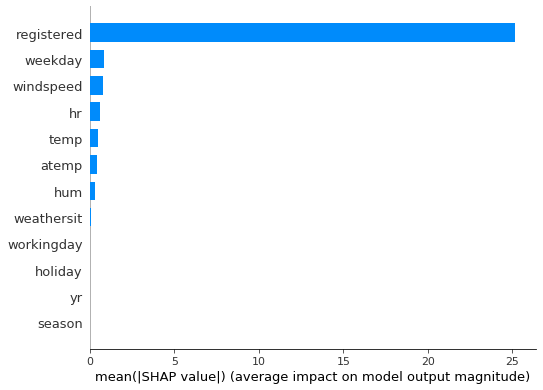

In [504]:
# Need to load JS vis in the notebook
shap.initjs()

from sklearn.metrics import accuracy_score

reg = RandomForestRegressor().fit(X, y)
reg.score(X, y)
pred = reg.predict(X)
pred

explainer = shap.KernelExplainer(reg.predict, X[:50])
shap_values = explainer.shap_values(X[:50])
shap.summary_plot(shap_values, X[:50], plot_type="bar")

Here we see that in the random forest method, we can see that a Sharpley Value analysis suggests that "registered" to be the variable with the most weight. Our randomGen analysis seems to suggests the same things as the "registered" variable experienced the most rapid general rate of decline when compared to other variables. 

### 4) Linear Regression of airfoil_self_noise.dat data

RandomGen Accuracy: 1.0


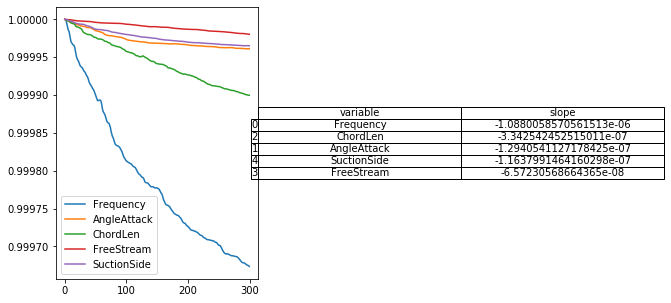

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#data = pd.read_csv('airfoil_self_noise.dat')
data = pd.read_table("airfoil_self_noise.dat")


X = data.loc[:, data.columns != 'Soundpressure']
y = data['Soundpressure']
    
randMethod.createGraph(X,y,list(X.columns),300, LinearRegression(), True) 
print("RandomGen Accuracy:", randMethod.accuracyScore(X,y,list(X.columns),200,LinearRegression(),['Frequency','ChordLen'],3))

Using 1503 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


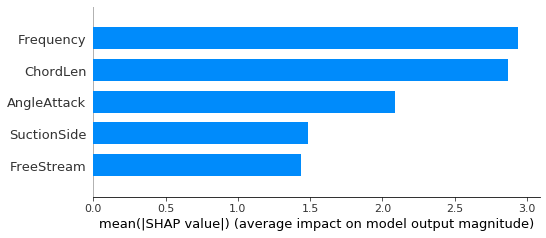

In [51]:
data = pd.read_table('airfoil_self_noise.dat')
dataSamp = data
X = dataSamp.loc[:, data.columns != 'Soundpressure']
y = dataSamp['Soundpressure']

# Need to load JS vis in the notebook
shap.initjs()

reg = LinearRegression().fit(X, y)

explainer = shap.KernelExplainer(reg.predict, X)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X, plot_type="bar")

### 5) RandomForestRegressor of airfoil_self_noise.dat data

Index(['Frequency', 'AngleAttack', 'ChordLen', 'FreeStream', 'SuctionSide'], dtype='object')

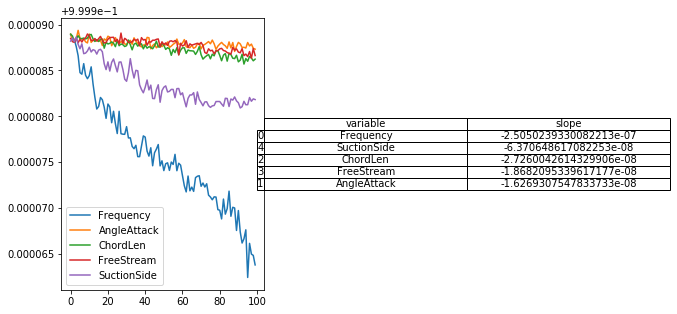

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data = pd.read_table("airfoil_self_noise.dat")


X = data.loc[:, data.columns != 'Soundpressure']
y = data['Soundpressure']
    
randMethod.createGraph(X,y,list(X.columns),100, RandomForestRegressor(),False) #without smoothing 
X.columns

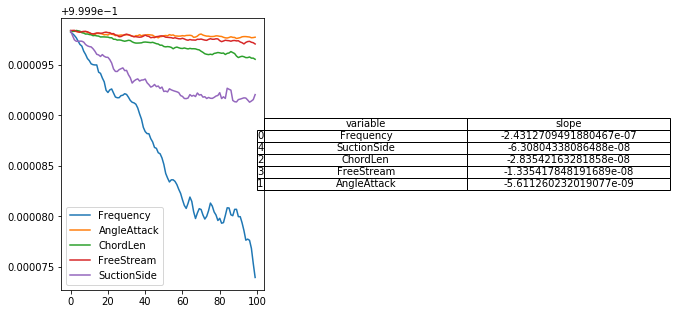

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data = pd.read_table("airfoil_self_noise.dat")


X = data.loc[:, data.columns != 'Soundpressure']
y = data['Soundpressure']
    
randMethod.createGraph(X,y,list(X.columns),100, RandomForestRegressor(),True) #with smoothing 
#print("RandomGen Accuracy:", randMethod.accuracyScore(X,y,list(X.columns),100,RandomForestRegressor(),['Frequency','SuctionSide'],3))

Using 500 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


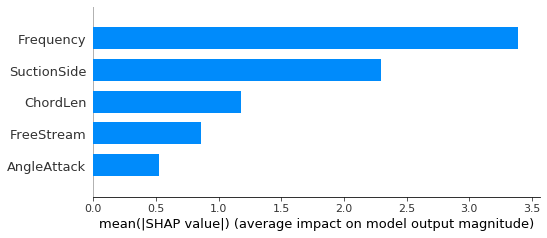

In [62]:
data = pd.read_table('airfoil_self_noise.dat')
dataSamp = data.sample(n=500)
X = dataSamp.loc[:, data.columns != 'Soundpressure']
y = dataSamp['Soundpressure']

# Need to load JS vis in the notebook
shap.initjs()

reg = RandomForestRegressor().fit(X, y)

explainer = shap.KernelExplainer(reg.predict, X)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X, plot_type="bar")

### 6) LogisticRegression of happinessSurvey.dat data

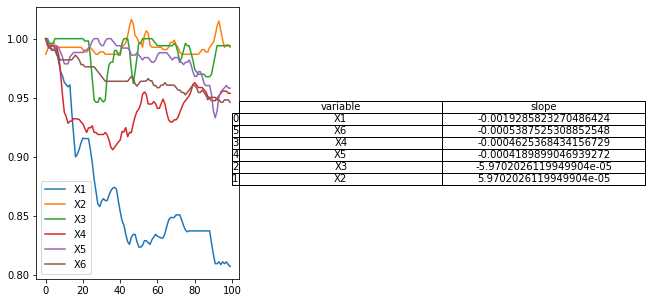

In [15]:
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris

data = pd.read_table("happinessSurvey.dat")
data

X = data.loc[:, data.columns != 'D']
y = data['D']
    
randMethod.createGraph(X,y,list(X.columns),100, LogisticRegression(),True) 

Using 143 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


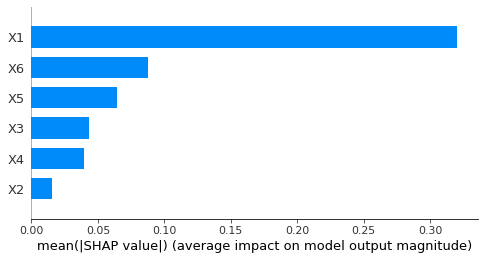

In [4]:
data = pd.read_table("happinessSurvey.dat")
dataSamp = data
X = dataSamp.loc[:, data.columns != 'D']
y = dataSamp['D']

# Need to load JS vis in the notebook
shap.initjs()

reg = LogisticRegression().fit(X, y)

explainer = shap.KernelExplainer(reg.predict, X)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X, plot_type="bar")

### 7) RandomForestRegressor of happinessSurvey.dat data

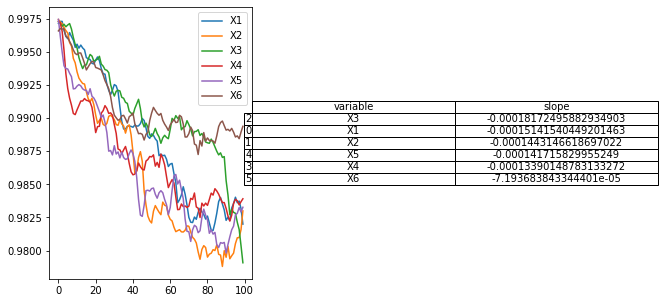

In [17]:
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris

data = pd.read_table("happinessSurvey.dat")
data

X = data.loc[:, data.columns != 'D']
y = data['D']
    
randMethod.createGraph(X,y,list(X.columns),100, RandomForestRegressor(),True) 

Using 143 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


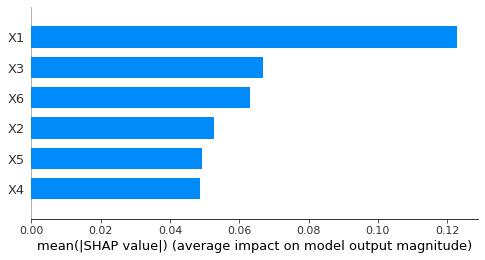

In [8]:
data = pd.read_table("happinessSurvey.dat")
dataSamp = data
X = dataSamp.loc[:, data.columns != 'D']
y = dataSamp['D']

# Need to load JS vis in the notebook
shap.initjs()

reg = RandomForestRegressor().fit(X, y)

explainer = shap.KernelExplainer(reg.predict, X)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X, plot_type="bar")

## Test Below